In [1]:
%matplotlib inline

In [100]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import pytpc

import sys
sys.path.insert(0, '../modules/')
import dataDiscretization as dd

# Real Data

In [10]:
data_path = '../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [12]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
p_indices = labels.loc[(labels['label'] == 'p')]['evt_id'].index[:]

print(p_indices)

Int64Index([  12,   24,   31,   55,   60,   65,   67,   70,   72,   78,
            ...
             976,  978,  980,  984,  989,  993,  994,  998, 1000, 1001],
           dtype='int64', length=215)


In [72]:
i = 0

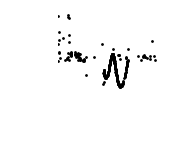

In [92]:
#i += 1

real_evt = file[p_indices[i]]

real_xyzs = real_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)

plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(real_xyzs[:,2], real_xyzs[:,1],'.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/real-test_128_smallpts.png')

# Simulated Data 

In [77]:
hdfpath = '../data/tilt/p_40000_tilt.h5'
simfile = pytpc.HDFDataFile(hdfpath, 'r')

In [ ]:
i = 0

(0.0, 1250.0, -275.0, 275.0)

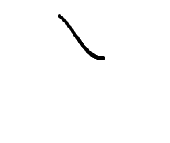

In [113]:
#i += 1

sim_evt = simfile[i]

sim_xyzs = sim_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=False, baseline_correction=True, cg_times=True)

plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(sim_xyzs[:,2], sim_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')

In [122]:
simnoise_xyzs = dd.addNoise(sim_xyzs)
print(sim_xyzs.shape)
print(simnoise_xyzs.shape)

(187, 4)
(246, 4)


(0.0, 1250.0, -275.0, 275.0)

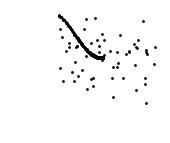

In [123]:
plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(simnoise_xyzs[:,2], simnoise_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(sim_xyzs[:,2], sim_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')

# Simulated Pure Noise Events

In [133]:
empty_evt = np.empty([1,4])
junk_evt = dd.addNoise(empty_evt)

In [134]:
print(noise_evt.shape)

(285, 4)


(0.0, 1250.0, -275.0, 275.0)

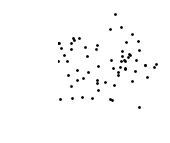

In [135]:
plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(junk_evt[:,2], junk_evt[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/simnoise-test.png')